# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 1. Cвойства оценок
### Дедлайн --- 10 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [228]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

Зафиксируем `seed` для воспроизводимости.

In [229]:
np.random.seed(42)

### Задача 1

Сгенерируйте выборку $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [230]:
N = 1e4  # use this

# YOUR CODE GOES HERE
theta = 1
distr = sps.uniform(loc=0, scale=theta).rvs(size=int(N))

Для всех $n \leqslant N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [231]:
# YOUR CODE GOES HERE
cumsums = distr.cumsum()
indexes = np.arange(1, N + 0.5, 1)
est1 = 2 * cumsums / indexes

maxs = np.maximum.accumulate(distr)
mins = np.minimum.accumulate(distr)

est2 = (est1 + maxs) / 2
est3 = (indexes + 1) * mins
est4 = mins + maxs
est5 = maxs * (indexes + 1) / indexes


Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$. Если некоторые оценки (при фиксированном значении $n$) сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки можно соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

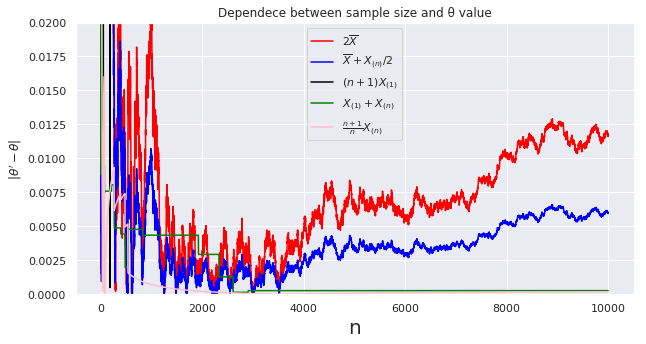

In [232]:
# YOUR CODE GOES HERE
def build_plot(est1, est2, est3, est4, est5):
    plt.figure(figsize = (10, 5))
    x_axis = np.arange(1, N + 0.5, 1)
    plt.xlabel('X size', size = 20)
    plt.ylabel('Difference')
    plt.ylim(0, 0.02)

    plt.plot(x_axis, abs(theta - est1), color='red', label = '$2\overline{X}$')
    plt.plot(x_axis, abs(theta - est2), color='blue', label = '$\\overline{X} + X_{(n)}/ 2$')
    plt.plot(x_axis, abs(theta - est3), color='black', label = '$(n + 1)X_{(1)}$')
    plt.plot(x_axis, abs(theta - est4), color='green', label = '$X_{(1)} + X_{(n)}$')
    plt.plot(x_axis, abs(theta - est5), color='pink', label = '$\\frac{n+1}{n} X_{(n)}$')

    plt.title('Dependece between sample size and θ value')
    plt.xlabel('n')
    plt.ylabel(r"$|\theta' - \theta|$")
    plt.legend()
    plt.show()
build_plot(est1, est2, est3, est4, est5)

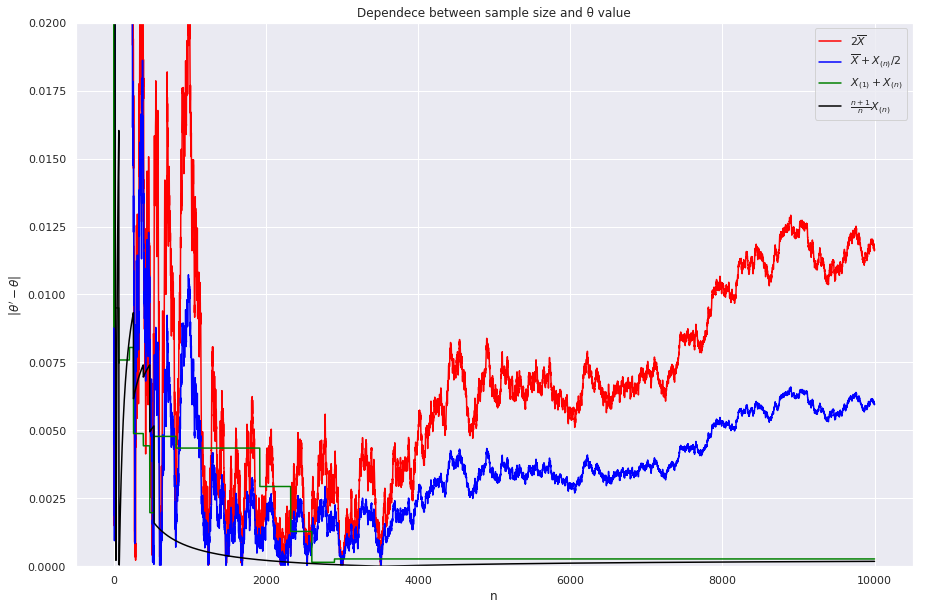

In [233]:
plt.figure(figsize=(15,10))
x_axis = np.arange(1, N + 0.5, 1)
plt.plot(x_axis, abs(theta - est1), color='red', label = '$2\overline{X}$')
plt.plot(x_axis, abs(theta - est2), color='blue', label = '$\\overline{X} + X_{(n)}/ 2$')
plt.plot(x_axis, abs(theta - est4), color='green', label = '$X_{(1)} + X_{(n)}$')
plt.plot(x_axis, abs(theta - est5), color='black', label = '$\\frac{n+1}{n} X_{(n)}$')

plt.title('Dependece between sample size and θ value')
plt.xlabel('n')
plt.ylabel(r"$|\theta' - \theta|$")
plt.ylim(0, 0.02)
plt.legend();

Какая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)?

__Ответ:__ 
Лучше получилась оценка $\frac{n + 1}{n}X_{(n)}$


Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

In [234]:
# YOUR CODE GOES HERE
def plot_for_specific_theta(theta):
    points_num = int(N)
    distr = sps.uniform(loc=0, scale=theta).rvs(size=points_num)

    cumsums = distr.cumsum()
    indexes = np.arange(1, N + 0.5, 1)
    est1 = 2 * cumsums / indexes

    maxs = np.maximum.accumulate(distr)
    mins = np.minimum.accumulate(distr)

    est2 = (est1 + maxs) / 2
    est3 = (indexes + 1) * mins
    est4 = mins + maxs
    est5 = maxs * (indexes + 1) / indexes
    
    plt.figure(figsize = (20, 15))
    x_axis = np.arange(1, N + 0.5, 1)
    plt.xlabel('X size', size = 20)
    plt.ylabel('Difference')
    plt.ylim(0, 2)

    plt.plot(x_axis, abs(theta - est1), color='red', label = '$2\overline{X}$')
    plt.plot(x_axis, abs(theta - est2), color='blue', label = '$\\overline{X} + X_{(n)}/ 2$')
    plt.plot(x_axis, abs(theta - est3), color='black', label = '$(n + 1)X_{(1)}$')
    plt.plot(x_axis, abs(theta - est4), color='green', label = '$X_{(1)} + X_{(n)}$')
    plt.plot(x_axis, abs(theta - est5), color='pink', label = '$\\frac{n+1}{n} X_{(n)}$')

    plt.title('Dependece between sample size and θ value')
    plt.xlabel('n')
    plt.ylabel(r"$|\theta' - \theta|$")
    plt.legend()


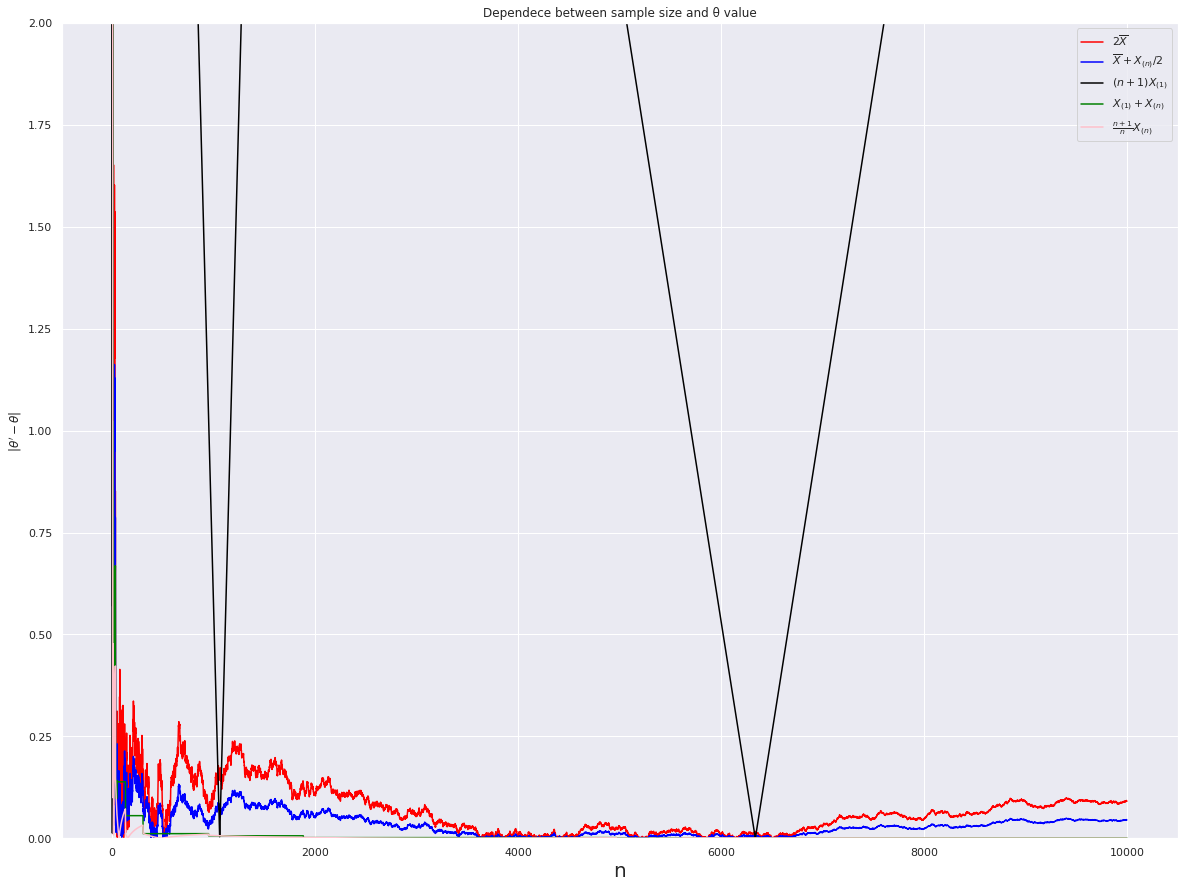

In [235]:
plot_for_specific_theta(10)

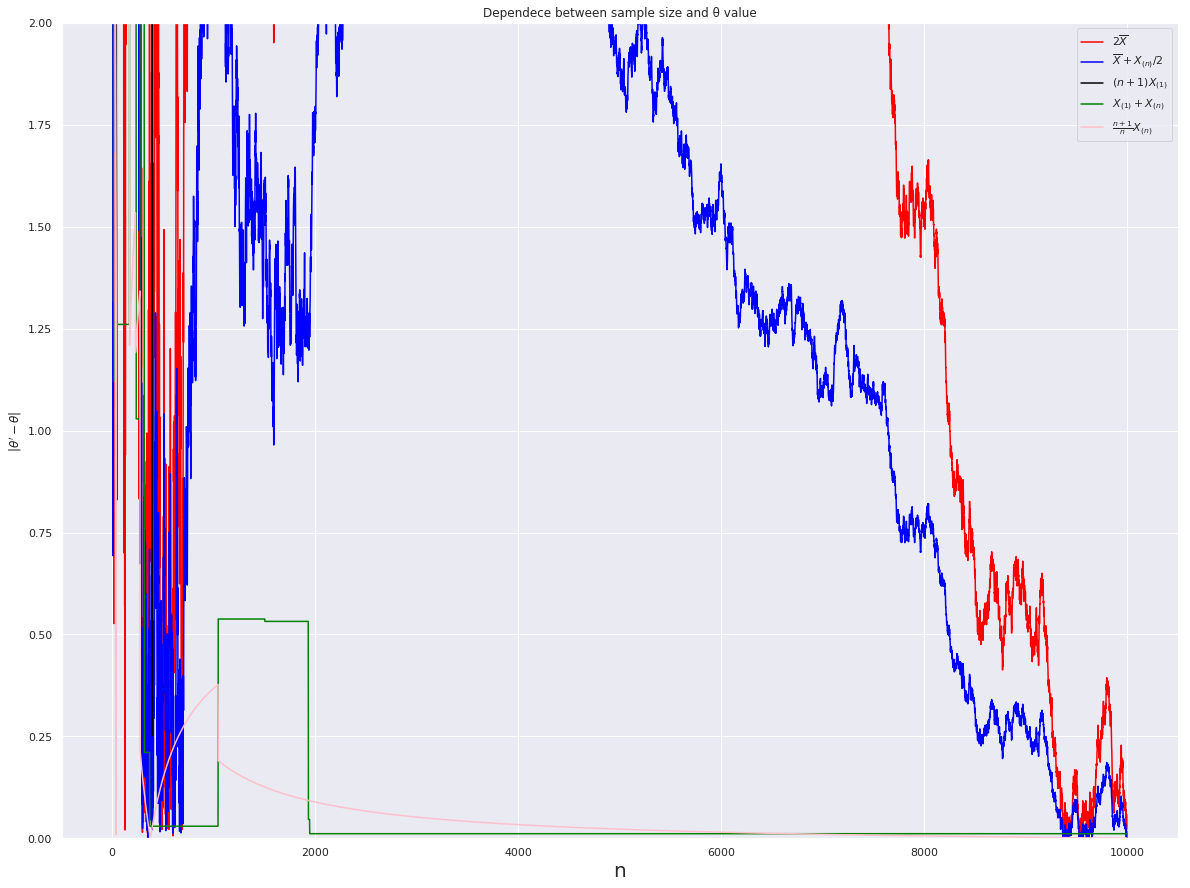

In [236]:
plot_for_specific_theta(222)

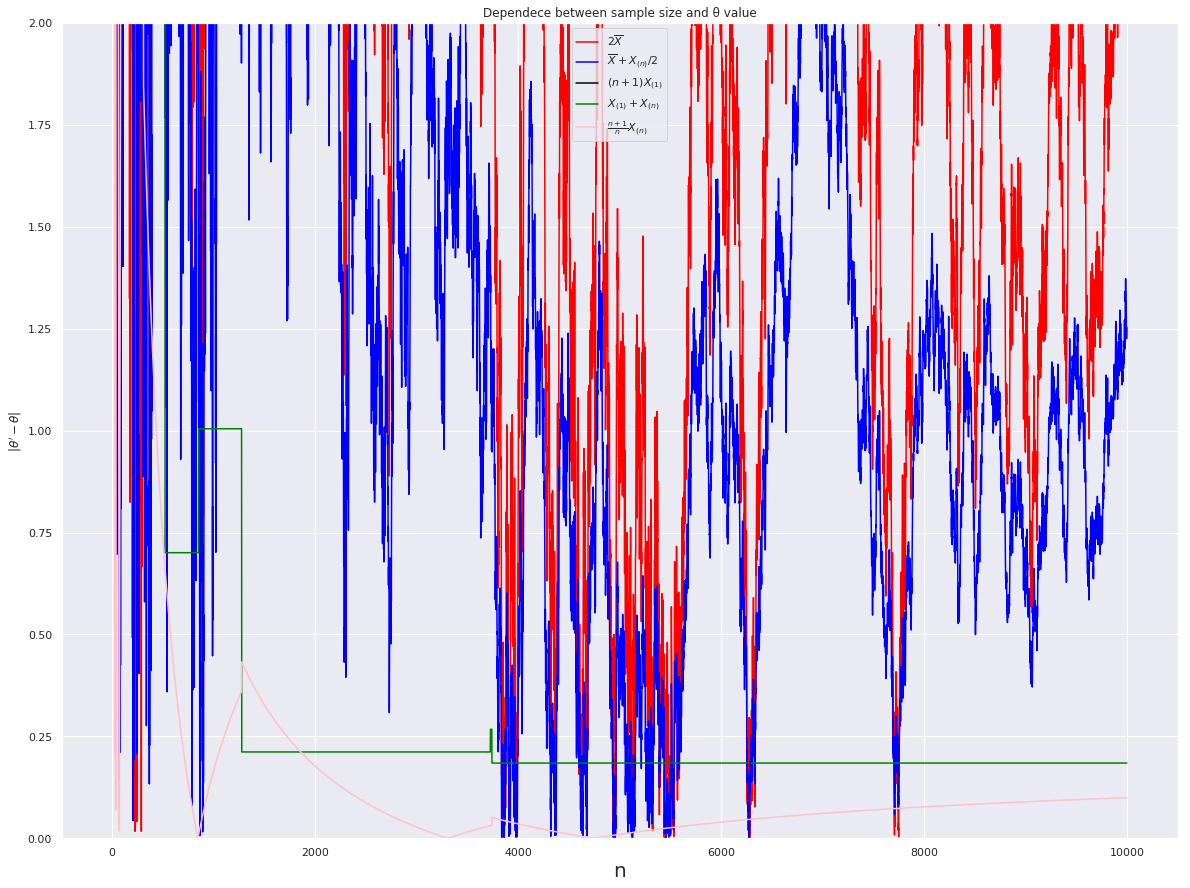

In [237]:
plot_for_specific_theta(900)

Сделайте вывод.


__Вывод:__ Оценки $X_{(1)} + X_{(n)}$ и $\frac{n+1}{n} X_{(n)}$ подходят намного лучше остальных. Оценка $(n+1)X_{(1)}$ не подходит

### Задача 2

Сгенерируйте выборку $X_1, ..., X_N$ из экспоненциального распределения с параметром $\theta = 1$ для $N = 10^4$. 

In [238]:
# YOUR CODE GOES HERE
N = 1e4
theta = 1
distr = sps.expon(theta).rvs(int(N))

Для всех $n \leqslant N$ посчитайте оценку $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ параметра $\theta$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$).

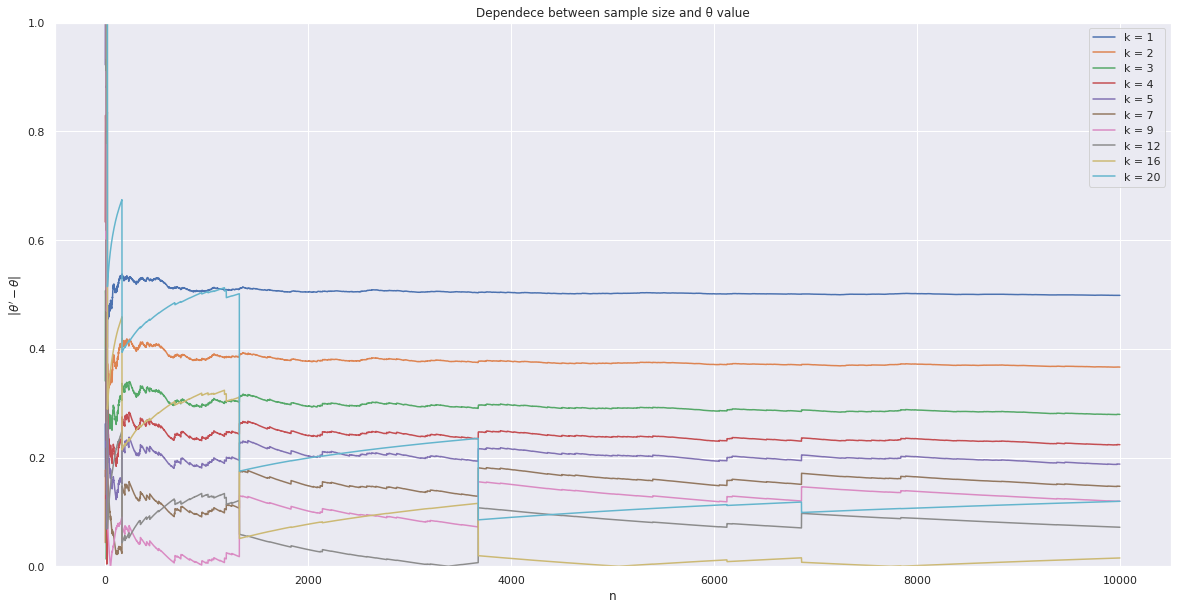

In [239]:
# YOUR CODE GOES HERE
k_list = [1, 2, 3, 4, 5, 7,9,12,16,20]
plt.figure(figsize=(20,10))

for k in k_list:
    deg_distr = distr ** k
    estimation = (np.math.factorial(k) / (deg_distr.cumsum() / np.arange(1, N + 0.5))) ** (1/k)
    
    x_axis = np.arange(1, N + 0.5)
    plt.ylim(0, 1)
    plt.plot(x_axis, abs(theta - estimation), label = 'k = {}'.format(k))
    plt.title('Dependece between sample size and θ value')
    plt.xlabel('n')
    plt.ylabel(r"$|\theta' - \theta|$")
    
    plt.legend()

Сделайте вывод.


__Вывод:__ Есть тенденция, что при больших k оценка точнее

### Задача 3

Придумайте распределение, у которого конечны первые четыре момента, а пятый - нет. Сгенерируйте выборку $X_1, \dots, X_N$ из этого распределения для $N = 10^4$. 

In [240]:
# YOUR CODE GOES HERE

Постройте график плотности, а также нанесите точки выборки на график (с нулевой y-координатой)

**Подсказка**: Может быть полезен параметр `alpha` в функции `plt.plot`

In [241]:
# YOUR CODE GOES HERE

Для всех $n \leq N$ посчитайте оценку $s^2 = s^2(X_1,\dots, X_N)$ для дисперсии.

In [242]:
# YOUR CODE GOES HERE

Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$.

In [243]:
# YOUR CODE GOES HERE

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии. 


In [244]:
# YOUR CODE GOES HERE

### Задача 4

Сгенерируйте выборку $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [245]:
# YOUR CODE GOES HERE

N = 10000
distr = sps.norm.rvs(size = int(N))

Для всех $n \leqslant N$ посчитайте по ней эмпирическую функцию распределения.


In [246]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary

# YOUR CODE GOES HERE
functions = list()
for i in range(1, N + 1):
    functions.append(ECDF(distr[:i]))

Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различныз значений $n$).

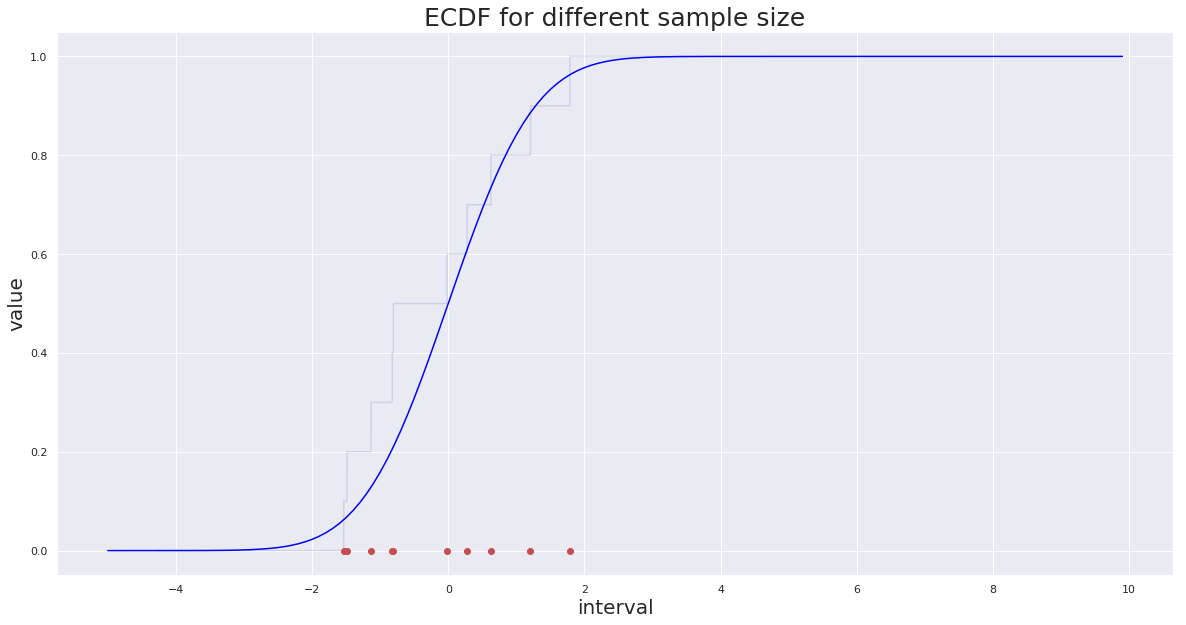

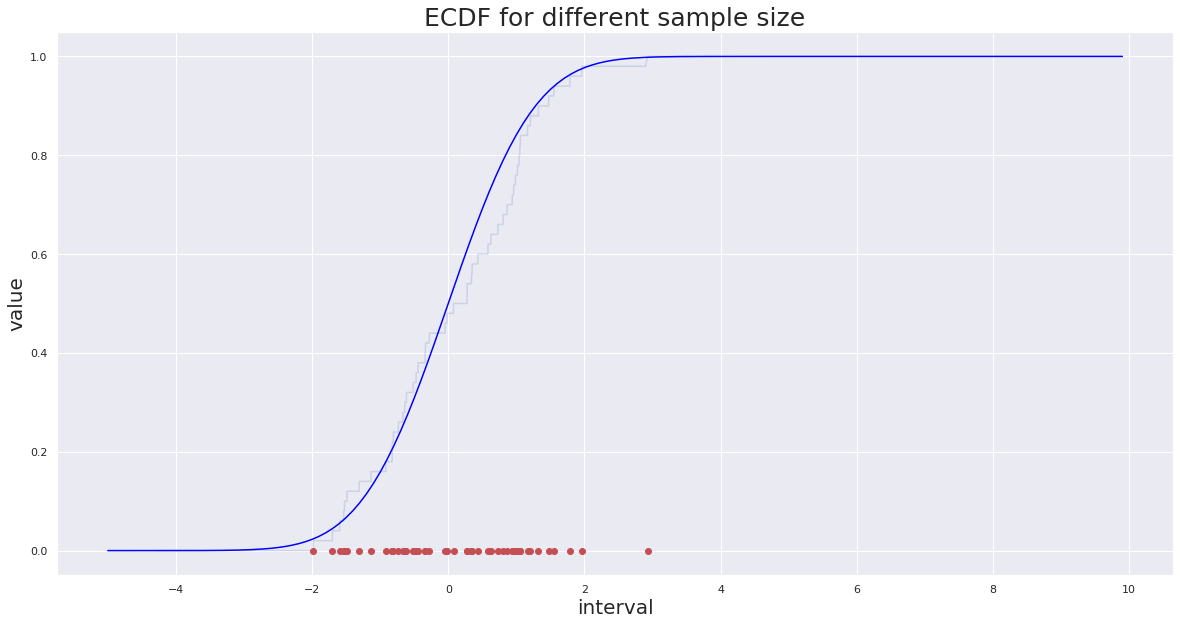

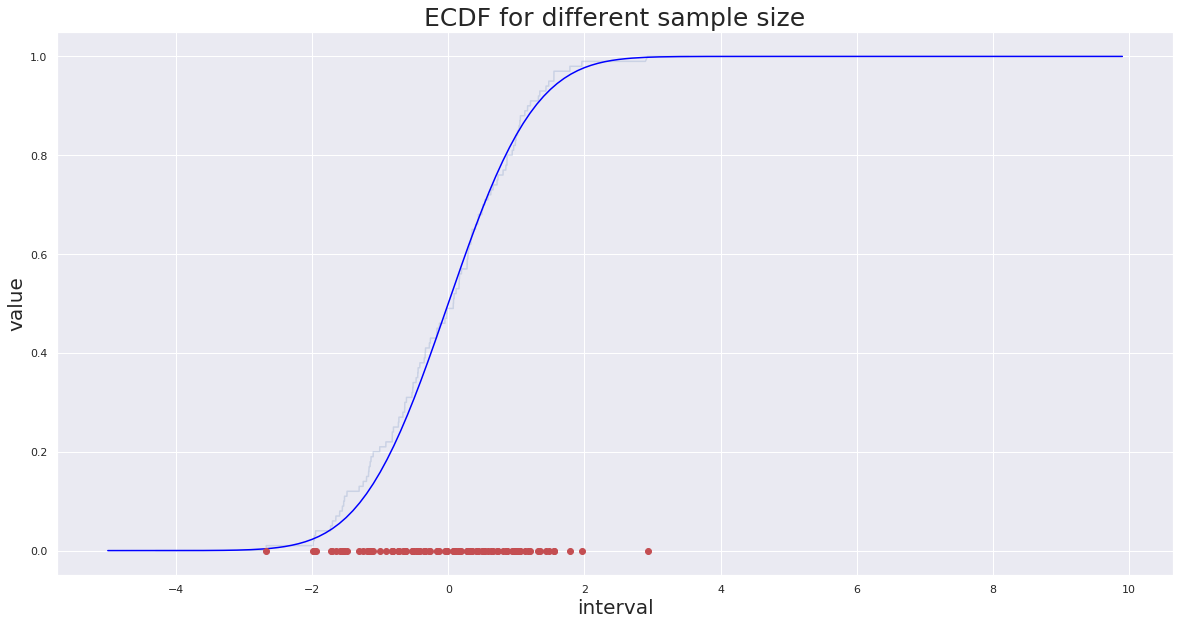

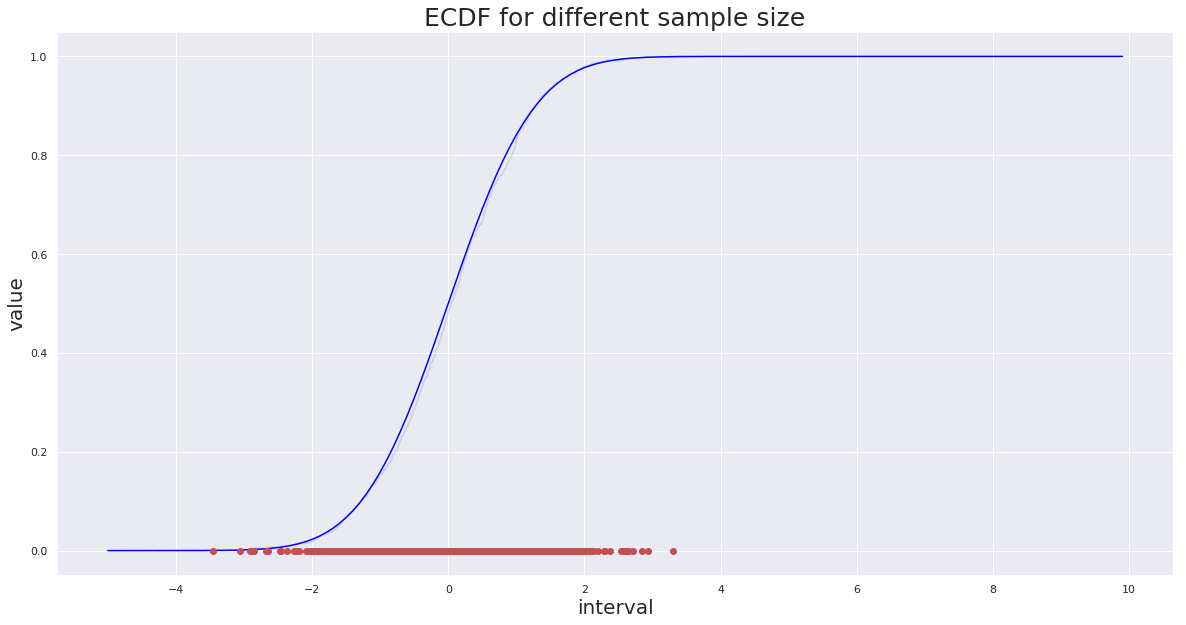

In [247]:
def emperial_func(n):
    plt.figure(figsize = (20, 10))

    plt.xlabel('interval', size = 20)
    plt.ylabel('value', size = 20)
    x_axis = np.arange(-5, 10, 0.1)
    sortedd = np.sort(distr)
    
    plt.title('ECDF for different sample size', size = 25)
    plt.plot(sortedd, functions[n - 1](sortedd), alpha=0.2)
    plt.plot(x_axis, sps.norm.cdf(x_axis), color='blue')
    plt.plot(distr[:n], np.zeros(n), 'ro')

emperial_func(10)
emperial_func(50)
emperial_func(100)
emperial_func(1000)

In [248]:
N

10000

Для всех $n ≤ N$ посчитайте точное значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ и постройте график зависимости статистик $D_n$ и $\sqrt{n}D_n$ от $n$. 


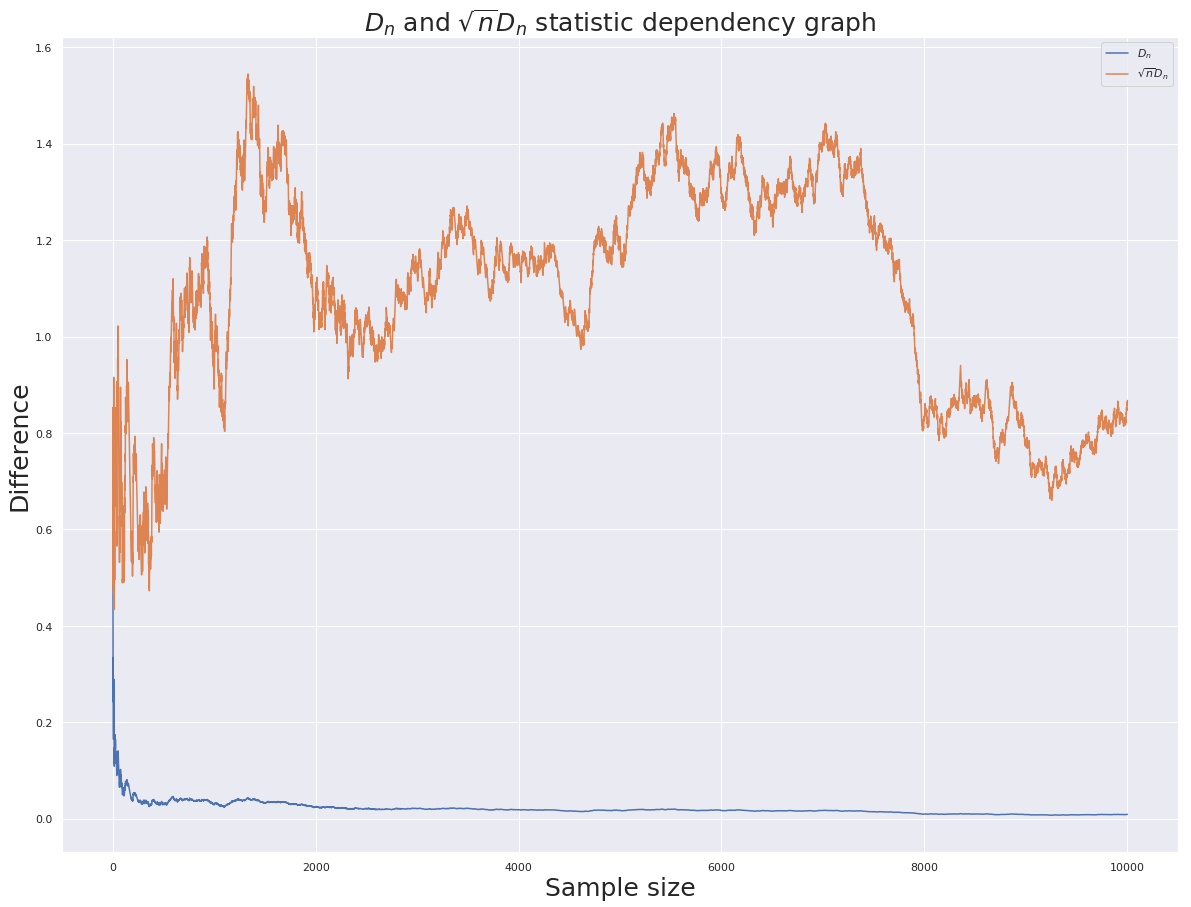

In [254]:
D = np.zeros((int(N)))
for i in range(N):
    D[i] = np.max(np.abs(functions[i](distr) - sps.norm.cdf(distr)))

x_axis = np.arange(1, N+1)
plt.figure(figsize = (20, 15))
plt.xlabel('Sample size', size = 25)
plt.ylabel('Difference', size = 25)
plt.plot(x_axis, D, label='$D_n$')

plt.title('$D_n$ and $\sqrt{n}D_n$ statistic dependency graph', size = 25)
DsqrtD = D * np.sqrt(x_axis)
plt.plot(x_axis, DsqrtD, label = '$\\sqrt{n}D_n$')

plt.legend()
plt.show()

### Задача 5

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Для каждой выборки посчитайте статистики $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

In [250]:
N_samples = 400
# N = 40

bins = [i / 40 + 0.8 for i in range(18)]

# YOUR CODE GOES HERE

Постройте гистограммы для статистик $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$

In [251]:
# YOUR CODE GOES HERE

На какие распределения похожи получившиеся гистограммы?

**Ответ:**

Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотиически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле 
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}} \xrightarrow{d} N(0, 1)
$$.

**Ответ**:

Посчитайте значения статистики
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}}$$
для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

AttributeError: 'NoneType' object has no attribute 'shape'

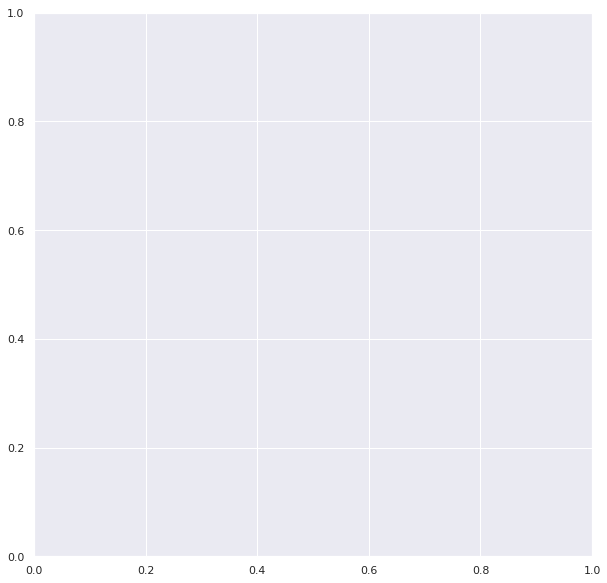

In [252]:
import statsmodels.api as sm


theta_norm = None  # YOUR CODE GOES HERE
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax)
fig.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:**

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:**

In [ ]:
# YOUR CODE GOES HERE

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:**

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.